## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 3
#### SIdorczuk Nicolás Andrés

***
## Estimación espectral


In [1]:
## Inicialización del Notebook del TP3

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################
from Funciones import *
from math import log10, floor
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

<div class="alert alert-block alert-info">
<b>1)</b> Compruebe experimentalmente las propiedades de sesgo y varianza del periodograma.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar una señal aleatoria con valores normalmente distribuidos de media nula y varianza **NO** unitaria, es decir $ x \sim \mathcal{N}(\mu=0,\sigma^2=2)$

</div>

Es decir, que el periodograma es un estimador de la densidad de potencia espectral (Ver Hayes 8.2.2):

$$ \hat{P_P}(e^{\frac{2\pi·k·f_S}{N}}) = \hat{P_P}(k) = \frac{1}{N}· \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza constante y **NO** depende de N.

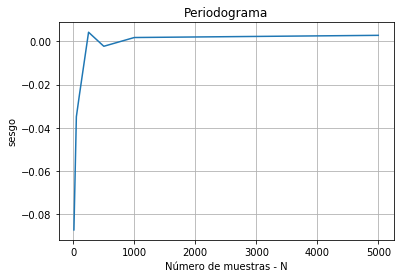

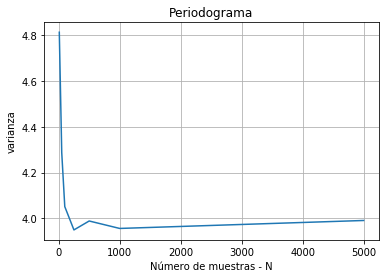

In [2]:
rep = 200
N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=int)
mu = 0
sigma2 = 2

sesgo = np.zeros(len(N))
varianza = np.zeros(len(N))

for j in range(len(N)):
    noise = np.random.normal(mu, np.sqrt(sigma2), (rep,N[j])) #Realizaciones

    PSDx = (abs(np.fft.fft(noise,axis=1))**2)/N[j]
    PSDp = np.mean(PSDx,axis=0)
    PSDvar = np.var(PSDx,axis=0)
    varianza[j] = np.mean(PSDvar,axis=0)
    sesgo[j] = sigma2 - np.mean(PSDp)

PrintArb(N,sesgo,'Número de muestras - N','sesgo','Periodograma')
PrintArb(N,varianza,'Número de muestras - N','varianza','Periodograma')


In [3]:
tus_resultados = [ 
                   [round_sig(sesgo[0],3), round_sig(varianza[0],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[1],3), round_sig(varianza[1],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[2],3), round_sig(varianza[2],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[3],3), round_sig(varianza[3],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[4],3), round_sig(varianza[4],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[5],3), round_sig(varianza[5],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[6],3), round_sig(varianza[6],4)], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_P$', '$v_P$'],
               index=N)
HTML(df.to_html())


,$s_P$,$v_P$
10,-0.08730,4.813
50,-0.03490,4.287
100,-0.02480,4.051
250,0.00427,3.949
500,-0.00224,3.988
1000,0.00182,3.956
5000,0.00283,3.991


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se observa que el sesgo disminuye asintóticamente a medida de que aumenta el número de muestras N. En cambio la varianza tiende a ser prácticamente constante y vale aproximadamente $\sigma^4$ una vez que N es grande, por lo que se vuelve independiente de N.
</div>

<div class="alert alert-block alert-info">
<b>2)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Bartlett.

</div>

Es decir, que el periodograma de Bartlett es un estimador de la densidad de potencia espectral que promedia K bloques disjuntos de las N muestras de una señal $x$ (Ver Hayes 8.2.4):

$$ \hat{P_B}(k) = \frac{1}{N}· \sum^{K-1}_{i=0} \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente a medida que aumenta K.
 + tiene una resolución espectral K veces menor

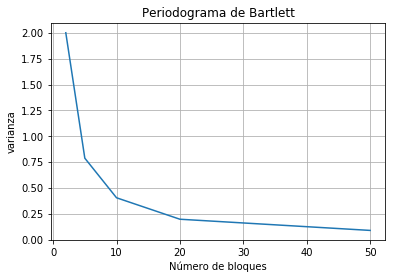

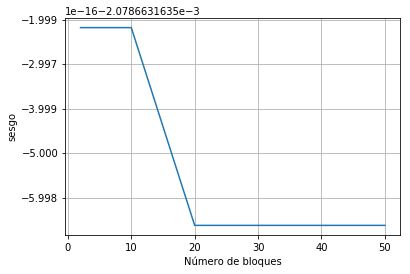

In [4]:
fs = 1000
Ts = 1/fs
N = 1000
K = np.array([2, 5, 10, 20, 50], dtype=int)
L = np.array(N/K, dtype=int)
mu = 0
sigma2 = 2
rep = 200
sesgo = np.zeros(len(K))
varianza = np.zeros(len(K))
noise = np.random.normal(mu, np.sqrt(sigma2), (rep,N)) #Realizaciones

for i in range(len(K)):
    PSDb = np.zeros([rep,L[i]])
    for k in range(rep):
        n1 = np.array(noise[k,:])
        x = np.zeros([K[i],L[i]])
        for j in range(K[i]):
            beg = j*L[i]
            fin = (j+1)*L[i]
            x[j,:] = n1[beg:fin]
        
        PSDx = (abs(np.fft.fft(x,axis=1))**2)/L[i]
        PSDb[k,:] = np.mean(PSDx,axis=0)
    
    PSDp = np.mean(PSDb,axis=0)
    PSDvar = np.var(PSDb,axis=0)
    varianza[i] = np.mean(PSDvar,axis=0)
    sesgo[i] = sigma2 - np.mean(PSDp)

PrintArb(K,varianza,'Número de bloques','varianza','Periodograma de Bartlett')
PrintArb(K,sesgo,'Número de bloques','sesgo','')
#plt.figure()
#plt.ylim(0.015,top=0)
#plt.plot(K,sesgo)

In [5]:
tus_resultados = [ 
                   [round_sig(sesgo[0],3), round_sig(varianza[0],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[1],3), round_sig(varianza[1],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[2],3), round_sig(varianza[2],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[3],3), round_sig(varianza[3],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[4],3), round_sig(varianza[4],4)], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_P$', '$v_P$'],
               index=K)
HTML(df.to_html())


,$s_P$,$v_P$
2,-0.00208,2.00000
5,-0.00208,0.78830
10,-0.00208,0.40590
20,-0.00208,0.19860
50,-0.00208,0.09054


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se observa que la varianza disminuye asintóticamente a medida de que aumenta el número de bloques K. Sin embargo el sesgo no lo hace ya que el número de muestras total N no cambio. Además los valores de varianza son aproximadamente $\sigma^2$/K que era lo esperado para el periodograma de bartlett.
</div>

<div class="alert alert-block alert-info">
<b>3)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Welch.

</div>

Es decir, que el periodograma de Welch es un estimador de la densidad de potencia espectral que promedia K bloques ventaneados por $w(n)$, posiblemente solapados de las N muestras de una señal $x$ (Ver Hayes 8.2.5):

$$ \hat{P_W}(k) = \frac{1}{K·L·U}· \sum^{K-1}_{i=0} \Bigg\vert \sum^{L-1}_{n=0}  x(n+i·D) · w(n) · e^{-j2\pi·k·n·\frac{f_S}{N}} \Bigg\vert^2   $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente, a medida que se promedian más bloques de señal.
 + tiene una resolución espectral inversamente proporcional al tamaño del bloque.

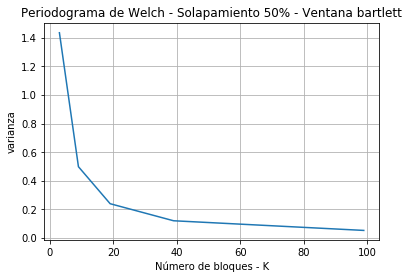

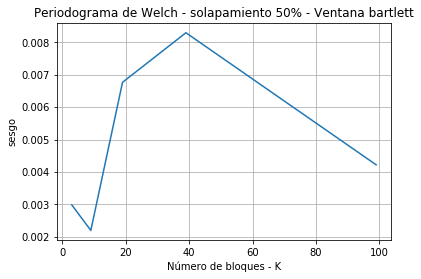

In [6]:
N = 1000
L = np.array([500, 200, 100,  50,  20], dtype=int)
D = np.array(L/2, dtype=int)
K = np.array(2 * (N/L) - 1, dtype=int)
mu = 0
sigma2 = 2

rep = 200
sesgo = np.zeros(len(K))
varianza = np.zeros(len(K))
noise = np.random.normal(mu, np.sqrt(sigma2), (rep,N)) #Realizaciones

for i in range(len(K)):
#    W = np.array(BartlettW(L[i])).reshape(1,L[i])
    W = np.array(BartlettW(L[i]))
    U = 0
    for n in range(len(W)):
        U += abs(W[n])**2
    U /= len(W)
    
    W = W.reshape(1,L[i])
    PSDw = np.zeros([rep,L[i]])
    for k in range(rep):
        n1 = np.array(noise[k,:])
        x = np.zeros([K[i],L[i]])
        for j in range(K[i]):
            beg = j*D[i]
            fin = int( (j/2 + 1)*L[i] )
            x[j,:] = n1[beg:fin]*W
        
        PSDx = (abs(np.fft.fft(x,axis=1))**2)/L[i]
        PSDw[k,:] = np.mean(PSDx,axis=0)
    
    PSDw /= U    
    PSDp = np.mean(PSDw,axis=0)
    PSDvar = np.var(PSDw,axis=0)
    varianza[i] = np.mean(PSDvar,axis=0)
    sesgo[i] = sigma2 - np.mean(PSDp)

PrintArb(K,varianza,'Número de bloques - K','varianza','Periodograma de Welch - Solapamiento 50% - Ventana bartlett')
PrintArb(K,sesgo,'Número de bloques - K','sesgo','Periodograma de Welch - solapamiento 50% - Ventana bartlett')

In [7]:
tus_resultados = [ 
                   [round_sig(sesgo[0],3), round_sig(varianza[0],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[1],3), round_sig(varianza[1],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[2],3), round_sig(varianza[2],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[3],3), round_sig(varianza[3],4)], # <-- acá debería haber numeritos :)
                   [round_sig(sesgo[4],3), round_sig(varianza[4],4)], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_P$', '$v_P$'],
               index=K)
HTML(df.to_html())


,$s_P$,$v_P$
3,0.00299,1.43600
9,0.00220,0.49910
19,0.00676,0.24040
39,0.00829,0.12120
99,0.00422,0.05365


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se observa que la varianza disminuye asintóticamente a medida de que aumenta el número de bloques K. Sin embargo el sesgo no lo hace ya que el número de muestras total N no cambio. Además los valores de varianza son aproximadamente $\frac{9}{8K}\sigma^2$ que era lo esperado para el periodograma de Welch.
</div>

<div class="alert alert-block alert-info">
<b>4)</b> Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

</div>

Para una señal $ x(k) = a_1 · \mathop{sen}(\Omega_1·k) + n(k)$

siendo 

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y las variables aleatorias definidas por

  $f_r \sim \mathcal{U}(-\frac{1}{2}, \, \frac{1}{2}) $

  $n \sim \mathcal{N}(0, \, \sigma ^2) $
  
Evalúe el siguiente estimador de $\Omega_1$

  $\hat{\Omega}_1^W = \mathop{arg\ max}_f \{ \hat{P_W} \} $
  
basado en el periodograma de Welch evaluado en **3)**. Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de $\Omega_1$

  $\hat{\Omega}_1^X = \mathop{arg\ max}_f \{ \hat{P_X} \} $

Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del *piso* de ruido impuesto por $n(k)$.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar el módulo de análisis espectral **Spectrum** donde encontrará la mayoría de los métodos descriptos en el Capítulo 8 del libro de Hayes.

</div>

4.267983542548136
2.0183021745376086


d:\program files\python37\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


,$\Omega_W$,$\Omega_X$
10 dB,250.0,249.975
3 dB,245.75,258.585


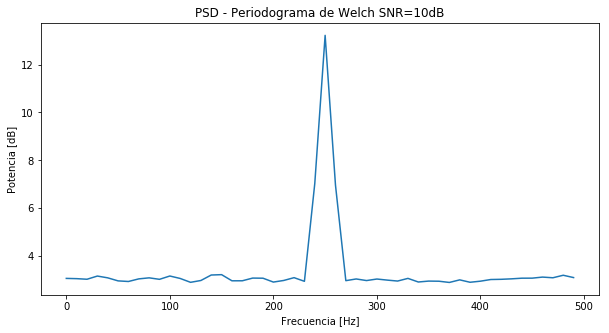

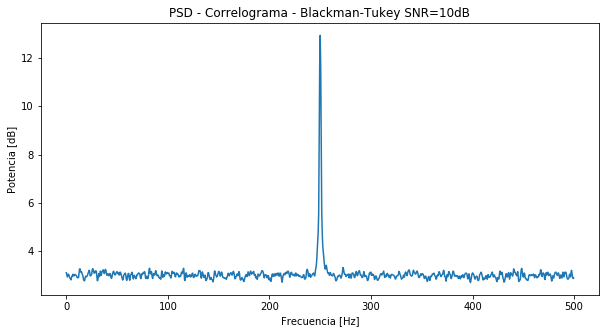

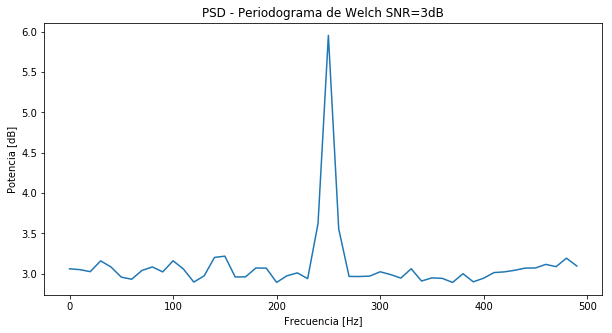

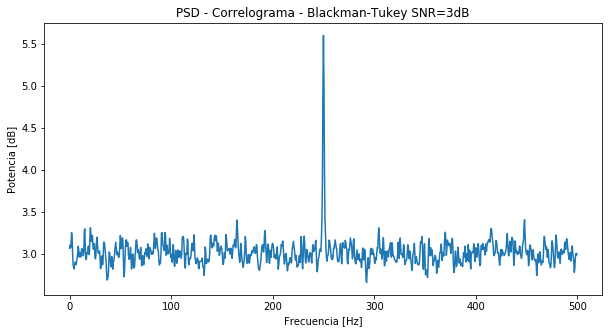

In [56]:
# Simular para los siguientes tamaños de señal

# Obtené los valores XX para que cumplas con el enunciado
#SNR = np.array([ XX, XX ], dtype=np.float)
from scipy.signal import correlate
##########################################
def Welch(s,N,L,rep):
    s = s.reshape(rep,N)
    K = int(2 * (N/L) - 1)
    D = int(L/2)
    W = np.array(BartlettW(L))
    U = sum(W**2)/len(W)      
    W = W.reshape(1,L)
    PSDw = np.zeros([rep,L])
    for k in range(rep):
        n1 = np.array(s[k,:])
        x = np.zeros([K,L])
        for j in range(K):
            beg = j*D
            fin = int( (j/2 + 1)*L )
            x[j,:] = n1[beg:fin]*W

        PSDx = (abs(np.fft.fft(x,axis=1))**2)/L
        PSDw[k,:] = np.mean(PSDx,axis=0)

    PSDw /= U
    PSDp = np.mean(PSDw,axis=0)    
    return PSDp,PSDw

# This is a port of the code accompanying Stoica & Moses' "Spectral Analysis of
# Signals" (Pearson, 2005): http://www2.ece.ohio-state.edu/~randy/SAtext/
def blackmanTukey(y, w, Nfft, fs=1):
    r = correlate(y, y) / (len(y)*2-1)
    rw = r * w
    phi = np.fft.fft(rw, Nfft)
    f = np.fft.fftfreq(Nfft,1/fs)
    #f = np.arange(Nfft) / Nfft
    #return (phi, f * fs)
    return phi,f
##########################################
N = 1000
rep = 200
fs = 1000
Ts = 1/fs
FF = (fs/2) / (np.pi)

fr = np.random.uniform(-0.5,0.5,(rep,1))
Om0 = np.pi/2
Om1 = Om0 + fr * (2*np.pi/N)
a1 = 1

L = 100
D = int(L/2)
K = int(2 * (N/L) - 1)

mu = 0
sigma2 = 2
n1 = np.random.normal(mu, np.sqrt(sigma2), (rep,N)) #Realizaciones
t = np.linspace(0,(N-1)*Ts,N).flatten()
s = a1 * np.sin(t*2*np.pi*Om1*FF) + n1
Omegas = np.zeros([2,2])
Varianzas  = np.zeros([2,2])

##################   SNR=10dB    ###########################
PSDp,PSDw = Welch(s,N,L,rep)
freq = np.fft.fftfreq(L, Ts)
PowerModule(freq, PSDp, 0, L/2, 10, 5, 'Periodograma de Welch SNR=10dB',tipo='plot',scale='log')
#Om = freq[np.argmax(PSDw[:,0:D],axis=1)]
#print(Om)
Varianzas[0,0] = np.var(freq[np.argmax(PSDw[:,0:D],axis=1)])
Omegas[0,0] = np.mean(freq[np.argmax(PSDw[:,0:D],axis=1)])

PW = 2*sum(PSDp[0:25])/len(PSDp[0:25])
print(PW)
PW = sum(PSDp[0:20])/len(PSDp[0:20])
print(PW)

a1 /= 2
PSDp = 0
Om = np.zeros(rep)
for i in range(rep):
    n = np.random.normal(mu, np.sqrt(sigma2), N) #Realizaciones
    t = np.linspace(0,(N-1)*Ts,N).flatten()
    s = a1 * np.sin(t*2*np.pi*Om1[i]*FF) + n
    w = np.array(BartlettW(2*N-1))
    BlTu,freq = blackmanTukey(s,w,2*N,fs)
    PSDp += abs(BlTu)
    Om[i] = freq[np.argmax(abs(BlTu[0:N]))]

PSDp = (PSDp/rep) + 1
Varianzas[0,1] = np.var(Om)
Omegas[0,1] = np.mean(Om)
PowerModule(freq,PSDp,0,N,10,5,'Correlograma - Blackman-Tukey SNR=10dB',tipo='plot',scale='log')

#####################   SNR=3dB    ##########################
a1 = 1 / 10**(5/10)
s = a1 * np.sin(t*2*np.pi*Om1*FF) + n1

PSDp,PSDw = Welch(s,N,L,rep)
freq = np.fft.fftfreq(L, Ts)
PowerModule(freq, PSDp, 0, L/2, 10, 5, 'Periodograma de Welch SNR=3dB',tipo='plot',scale='log')
Varianzas[1,0] = np.var(freq[np.argmax(PSDw[:,0:D],axis=1)])
Omegas[1,0] = np.mean(freq[np.argmax(PSDw[:,0:D],axis=1)])

a1/=2
PSDp = 0
for i in range(rep):
    n = np.random.normal(mu, np.sqrt(sigma2), N) #Realizaciones
    t = np.linspace(0,(N-1)*Ts,N).flatten()
    s = a1 * np.sin(t*2*np.pi*Om1[i]*FF) + n
    w = np.array(BartlettW(2*N-1))
    BlTu,freq = blackmanTukey(s,w,2*N,fs)
    PSDp += abs(BlTu)
    Om[i] = freq[np.argmax(abs(BlTu[0:N]))]

PSDp = (PSDp/rep) + 1
Varianzas[1,1] = np.var(Om)
Omegas[1,1] = np.mean(Om)
PowerModule(freq,PSDp,0,N,10,5,'Correlograma - Blackman-Tukey SNR=3dB',tipo='plot',scale='log')

tus_resultados = [ 
                   [str(Omegas[0,0]), str(Omegas[0,1])], # <-- acá debería haber numeritos :)
                   [str(Omegas[1,0]), str(Omegas[1,1])] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_W$', '$\Omega_X$'],
               index=['10 dB','3 dB'])
HTML(df.to_html())

   a) ¿Qué estimador ha elegido? Explique brevemente los fundamentos principales y el enfoque del método elegido.


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Elegí el estimador de blackman tukey. Este método intenta mejorar la varianza reduciendo la incidencia de los lags más alejados en la secuencia de autocorrelación. Esto se da porque tengo un número finito de muestras N y no infinito. Por lo tanto lo que se hace es aplicar una ventana a la secuencia de autocorrelación de la señal. Luego se cálcula la FFT y se eleva al cuadrado su módulo obteniendo la PSD. 
</div>

   b) ¿Qué indicador considera que sería apropiado para poder comparar el rendimiento de ambos estimadores $i_j$?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Hay que comparar la varianza que tiene cada estimador para estimar $\Omega$.
</div>

In [58]:

#######################################
# Tu simulación que genere resultados #
#######################################

# Una vez definido tu indicador de performance, calculalo y comparalo para las situaciones pedidas.
tus_resultados = [ 
                   [str(Varianzas[0,0]), str(Varianzas[0,1])], # <-- acá debería haber numeritos :)
                   [str(Varianzas[1,0]), str(Varianzas[1,1])] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$i_W$', '$i_X$'],
               index=[  
                        '10 dB',
                        '3 dB'
                     ])
HTML(df.to_html())


,$i_W$,$i_X$
10 dB,0.0,0.126875
3 dB,7150.4375,19627.200275
